# Analiza podatkov

Podatke sem zajel iz strani [RateYourMusic](https://rateyourmusic.com/charts/top/album/all-time/) (v nadaljevanj RYM), prek katere sem analiziral 
1000 najvišje ocenjenih glasbenih albumov. Za vsakega izmed teh albumov sem zajel naslov in izvajalce, leto izida, primarne in sekundarne žanre, 
opis albuma, povprečno oceno ter število ocen in kritik.

* ### Prva točka: porazdelitev izvajalcev glede na število dobrih albumov
Moja hipoteza je, da ima skupina the Beatles največ albumov med najboljših 1000.

* ### Druga točka: povezava med številom ocen in povprečno oceno albuma ter med številom ocen in številom kritik

Menim, da je število kritik linearno odvisno od števila ocen, povprečna ocena pa pada obratno sorazmerno z njim. 

* ### Tretja točka: število dobrih albumov glede na desetletje

Tukaj bom testiral hipotezo, da so bila 80-ta zlato obdobje popularne glasbe in je od tedaj vse šlo le še navzdol.

* ### Četrta točka: pogostost žanrov med najboljšimi

Moja hipoteza je, da je rock žanr, ki se najpogosteje pojavlja med najboljšimi albumi.

* ### Peta točka: najboljši glasbeniki po desetletjih

Ogledal si bom izvajalce, ki so za vsako posamezno desetletje ustvarili največji doprinos (oziroma so naredili največ dobrih albumov).

* ### Šesta točka: napoved žanra glasbe glede na lastnosti albuma

Testiral bom na primer hipotezo, da je album z ženskimi vokali najverjetneje žanra pop, album, ki zveni jezno, pa najverjetneje žanra metal.

## Uvod

Za začetek uvozimo knjižnico pandas in že pripravljene tabele.



In [32]:
import pandas as pd

pd.options.display.min_rows = 20

pd.options.display.max_rows = 20

In [2]:
albumi = pd.read_csv('obdelani-podatki/albumi.csv', index_col='id')

albumi

,naslov,leto,ocena,st_ocen,st_kritik,opisi
id,,,,,,
8,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
11,Are You Experienced,1967,4.12,23375,512,"energetic, psychedelic, sexual, drugs, raw, ma..."
12,Abbey Road,1969,4.25,44843,962,"melodic, warm, male vocals, bittersweet, summe..."
15,Magical Mystery Tour,1967,4.06,27507,561,"psychedelic, melodic, playful, surreal, male v..."
16,Sgt. Pepper's Lonely Hearts Club Band,1967,4.13,43846,868,"psychedelic, playful, melodic, male vocals, lu..."
19,Murmur,1983,3.90,14428,293,"cryptic, melodic, atmospheric, male vocals, po..."
26,Automatic for the People,1992,3.89,16105,330,"bittersweet, melancholic, melodic, passionate,..."
42,Led Zeppelin II,1969,3.94,26519,580,"energetic, sexual, heavy, male vocals, raw, he..."
43,Led Zeppelin [IV],1971,4.10,35181,873,"fantasy, folklore, male vocals, energetic, pas..."


In [3]:
zanri = pd.read_csv('obdelani-podatki/zanri.csv')

opus = pd.read_csv('obdelani-podatki/opus.csv')

## Prva točka

Glede na njihov status bi bilo naravno ugibati, da ima od vseh izvajalcev prav skupina The Beatles največ albumov med 1000 najboljših. Izkaže pa se, da je ta hipoteza zmotna.

In [59]:
opus_po_izvajalcih = opus.groupby('izvajalec')

dobri_albumi_na_izvajalca = opus_po_izvajalcih.size(
).sort_values(
    ascending=False
).to_frame('st_dobrih_albumov')

dobri_albumi_na_izvajalca.head(20)

,st_dobrih_albumov
izvajalec,
Bob Dylan,16
John Coltrane,15
Miles Davis,15
Neil Young,14
David Bowie,12
Iron Maiden,9
Black Sabbath,8
Led Zeppelin,8
King Crimson,8


Sedaj lahko za vsako število dobimo število izvajalcev, ki so naredili toliko "dobrih" albumov.

In [60]:
frekvenca_st_dobrih_albumov = dobri_albumi_na_izvajalca.groupby(
    'st_dobrih_albumov'
).size().to_frame('st_izvajalcev')

frekvenca_st_dobrih_albumov

,st_izvajalcev
st_dobrih_albumov,
1,427
2,106
3,49
4,25
5,9
6,7
7,4
8,7
9,1


<AxesSubplot:xlabel='st_dobrih_albumov'>

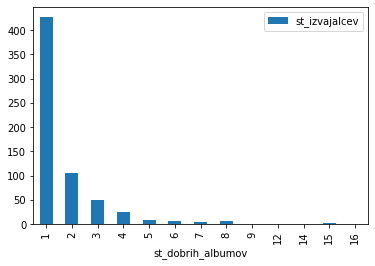

In [16]:
frekvenca_st_dobrih_albumov.plot.bar()

Ta graf pa nam ne pove prav veliko, zato števila izvajalcev raje seštejmo kumulativno.

<AxesSubplot:xlabel='st_dobrih_albumov'>

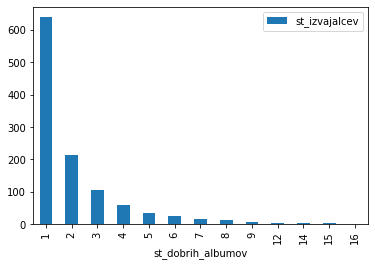

In [58]:
frekvenca_st_dobrih_albumov_kumulativno = frekvenca_st_dobrih_albumov.sort_values(
    'st_dobrih_albumov', 
    ascending=False
).cumsum().sort_values(
    'st_dobrih_albumov', 
    ascending=True
)

frekvenca_st_dobrih_albumov_kumulativno.plot.bar()

Opazimo, da kumulativna distribucija frekvence stevila dobrih albumov spominja na funkcijo oblike $$f(x) = \alpha x^{-k}.$$
Res, zdi se naravno, da tudi med najboljšimi glasbeniki pride največji doprinos le od peščice najboljših od najboljših.
Sklepamo lahko, da tudi v glasbi pride do pojava, [ko manjšina v nekem smislu dominira preostanek populacije](https://en.wikipedia.org/wiki/Power_law).

## Druga točka

Glede na [pravilo 1%](https://en.wikipedia.org/wiki/1%25_rule_(Internet_culture)), ki pravi, da na straneh kot so wikipedia le 1% uporabnikov sodeluje aktivno, bi lahko sklepali, da na vsakih 100 uporabnikov, ki na RYM pustijo oceno albuma obstaja en uporabnik, ki gre še dlje in napiše tudi kritiko albuma. Tako sem postavil hipotezo, da mora biti število kritik albuma linearno povezano s številom ocen. Moji podatki to hipotezo potrjujejo.

<AxesSubplot:xlabel='st_ocen', ylabel='st_kritik'>

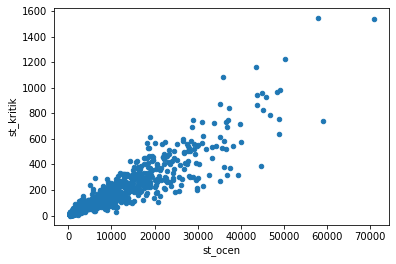

In [18]:
albumi.plot.scatter('st_ocen', 'st_kritik')

Za povprečno oceno pa bi pricakovali nasprotno; ko je ocen malo, lahko povprečne vrednosti zavzamejo ekstremne vrednosti, ki ne odražajo mnenja uporabnikov strani glede tega albuma. Ko pa se stevilo ocen poveča, pa se tudi povprečna ocena ustali in ponavadi pade. Gre za [pojav, ko je na primer kljub nižji povprečni vrednosti album z 49 pozitivnimi ocenami in 1 negativno oceno bolj 'preizkušen' kot album z le 10 pozitivnimi ocenami](https://en.wikipedia.org/wiki/Rule_of_succession).
Zato bi bilo pričakovati, da povprečna ocena pada z obratno vrednostjo števila ocen. Ta hipoteza pa je napačna.

<AxesSubplot:xlabel='st_ocen', ylabel='ocena'>

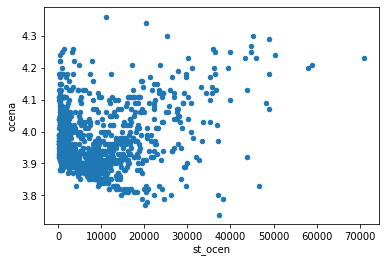

In [19]:
albumi.plot.scatter('st_ocen', 'ocena')

Povprečna ocena ob majhnem številu ocen res pada, kot sem napovedal, a se nato okoli točke, ko je število ocen enako 10000, počasi ustali in nadaljuje približno linearno. Možnih razlag za to je več, omenim pa naj, da so v splošnem razlike med povprečnimi ocenami dovolj majhne, da so statistično zanemarljive. Ker sem zajel le najboljše albume, se njihove ocene povečinoma gibajo od 3.9 do 4.1 in zato iz povprečnih ocen težko sklepamo kakršnekoli zaključke.

## Tretja točka

V tretji točki bom preveril hipotezo, če je bilo desetletje od 1980-1989 res vrhunec popularne glasbe. Pogledal bom število "dobrih" albumov, ki so bili izdani v posameznem desetletju.

<AxesSubplot:xlabel='desetletje'>

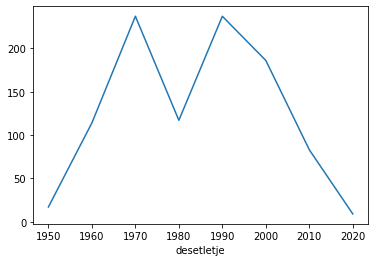

In [20]:
albumi_z_desetletji = albumi.copy(deep=True)

albumi_z_desetletji["desetletje"] = 10 * (albumi_z_desetletji.leto // 10)

albumi_po_desetletjih = albumi_z_desetletji.groupby('desetletje')

albumi_po_desetletjih.size().plot()

Moji podatki to hipotezo ovržejo. Zanimivo je, da so bili vsi albumi, ki sem jih zajel, izdani med letoma 1950 in 2022. 

In [21]:
albumi_po_desetletjih.ocena.mean()

desetletje
1950    3.984118
1960    3.999298
1970    3.977089
1980    3.952393
1990    3.967173
2000    3.964785
2010    3.970000
2020    3.945556
Name: ocena, dtype: float64

Če pogledamo še povprečne ocene glede na desetletja, pa opazimo, da so vrednosti skoraj popolnoma konstantne. Ponovno je to zaradi izredno majhne deviacije povprečnih ocen zajetih albumov.

## Četrta točka

Preverjam hipotezo, da rock, ki je bil do pred kratkim dominanten žanr popularne glasbe, predstavlja večino albumov na seznamu 1000 najboljših.

In [22]:
zdruzena_z_zanri = pd.merge(zanri, albumi, left_on='album', right_on='id')

zdruzena_z_zanri

,album,zanr,naslov,leto,ocena,st_ocen,st_kritik,opisi
0,8,Art Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
1,8,Blues Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
2,8,Folk Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
3,8,Hard Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
4,8,Pop Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
5,8,Psychedelic Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
6,8,Rock,The Beatles [White Album],1968,4.14,35780,1082,"eclectic, melodic, playful, male vocals, intro..."
7,11,Acid Rock,Are You Experienced,1967,4.12,23375,512,"energetic, psychedelic, sexual, drugs, raw, ma..."
8,11,Blues Rock,Are You Experienced,1967,4.12,23375,512,"energetic, psychedelic, sexual, drugs, raw, ma..."
9,11,Hard Rock,Are You Experienced,1967,4.12,23375,512,"energetic, psychedelic, sexual, drugs, raw, ma..."


In [61]:
stevilo_del_po_zanru = zdruzena_z_zanri.groupby('zanr').size(
).sort_values(
    ascending=False
).to_frame("stevilo")

stevilo_del_po_zanru.head(20)

,stevilo
zanr,
Singer/Songwriter,105
Hard Rock,94
Art Rock,92
Blues Rock,87
Progressive Rock,80
Folk Rock,71
Psychedelic Rock,69
Experimental Rock,62
Heavy Metal,52


Na prvi pogled se zdi, da je moja hipoteza ovržena in da so med uporabniki kantavtorji bolj cenjeni kot rockerji. Vendar pa se izkaže, da so uporabniki strani RYM nekoliko prismuknjeni in si zato pogosto izmislijo prismuknjena imena za žanre.
Tako lahko med žanri albumov najdemo fraze, kot so "Math Rock, "Yacht Rock" ali pa "Space Rock Revival". V našem interesu je, da vse takšne albumi štejemo enostavno pod rock. Pogledal bom torej vse take albume, katerih vsaj eden od žanrov vsebuje podniz "Rock". Da bodo zadeve še zanimivejše, pa lahko spotoma pogledam tudi najuspešnejše izvajalce v tem žanru.

In [25]:
zanri_in_opus = pd.merge(opus, zanri)

zanri_in_opus

,album,izvajalec,zanr
0,8,The Beatles,Art Rock
1,8,The Beatles,Blues Rock
2,8,The Beatles,Folk Rock
3,8,The Beatles,Hard Rock
4,8,The Beatles,Pop Rock
5,8,The Beatles,Psychedelic Rock
6,8,The Beatles,Rock
7,11,The Jimi Hendrix Experience,Acid Rock
8,11,The Jimi Hendrix Experience,Blues Rock
9,11,The Jimi Hendrix Experience,Hard Rock


Ker ima posamezen album lahko tudi več oznak žanrov, ki vsebujejo besedo "Rock", moramo pobrisati podvojitve albumov. Zanima nas namreč le število pojavitev.

In [27]:
zanri_in_opus.loc[
    zanri_in_opus['zanr'].str.contains("Rock", case=False)
].drop_duplicates(
    subset=['album']
).groupby(
    'izvajalec'
).size().sort_values(ascending=False).head(20)

izvajalec
Bob Dylan                      14
Neil Young                     14
David Bowie                    12
Miles Davis                     9
The Beatles                     8
King Crimson                    8
Led Zeppelin                    8
Pink Floyd                      8
Black Sabbath                   7
The Jimi Hendrix Experience     7
Swans                           7
Rush                            7
Talking Heads                   6
Radiohead                       6
Nirvana                         6
Frank Zappa                     6
Grateful Dead                   6
Bruce Springsteen               6
The Rolling Stones              5
The Who                         5
dtype: int64

Sedaj pa lahko to pretvorimo v tabelo in povemo pandas, da v zadnji vrstici izpiše še skupno število vseh rock albumov.

In [29]:
izvajalci_po_zanru = zanri_in_opus.loc[
    zanri_in_opus['zanr'].str.contains("Rock", case=False)
].drop_duplicates(
    subset=['album']
).groupby(
    'izvajalec'
).size().sort_values(ascending=False).to_frame("stevilo")

izvajalci_po_zanru.append(izvajalci_po_zanru.sum().rename('Skupaj'))

,stevilo
izvajalec,
Bob Dylan,14
Neil Young,14
David Bowie,12
Miles Davis,9
The Beatles,8
King Crimson,8
Led Zeppelin,8
Pink Floyd,8
Black Sabbath,7


To pomeni, da lahko skoraj polovico vseh zajetih albumov med drugim kategoriziramo kot rock. Podobno lahko naredimo tudi za žanre, kot so "Pop" ali pa "Hip Hop". Potem primerjamo skupne izkupičke in menim, da je bila moja hipoteza navsezadnje le resnična.

In [30]:
izvajalci_po_zanru = zanri_in_opus.loc[
    zanri_in_opus['zanr'].str.contains("Pop", case=False)
].drop_duplicates(
    subset=['album']
).groupby(
    'izvajalec'
).size().sort_values(ascending=False).to_frame("stevilo")

izvajalci_po_zanru.append(izvajalci_po_zanru.sum().rename('Skupaj'))

,stevilo
izvajalec,
The Beatles,8
David Bowie,8
Kraftwerk,4
Radiohead,4
The Beach Boys,3
The Kinks,3
Fishmans,3
The Smiths,3
Ween,3


In [33]:
izvajalci_po_zanru = zanri_in_opus.loc[
    zanri_in_opus['zanr'].str.contains("Hip hop", case=False)
].drop_duplicates(
    subset=['album']
).groupby(
    'izvajalec'
).size().sort_values(ascending=False).to_frame("stevilo")

izvajalci_po_zanru.append(izvajalci_po_zanru.sum().rename('Skupaj'))

,stevilo
izvajalec,
Kanye West,4
A Tribe Called Quest,3
Death Grips,3
OutKast,3
Kendrick Lamar,2
Jay-Z,2
Public Enemy,2
Ghostface Killah,2
Racionais MC's,2


Za zanimivost pa lahko žanre naivno razvrstimo še po povprečnih ocenah albumov.

In [35]:
stevilo_del_po_zanru = zdruzena_z_zanri.groupby('zanr').size().sort_values(
    ascending=False).to_frame("stevilo")

povprecna_ocena_po_zanru = zdruzena_z_zanri.groupby('zanr').ocena.mean().sort_values(
    ascending=False).to_frame("ocena")

ocena_in_stevilo_zanrov = pd.merge(
    povprecna_ocena_po_zanru, 
    stevilo_del_po_zanru, 
    left_on="zanr", right_on="zanr"
)

ocena_in_stevilo_zanrov[ocena_in_stevilo_zanrov.stevilo > 5].head(20)

,ocena,stevilo
zanr,,
Free Improvisation,4.137500,8
Sunshine Pop,4.078889,9
Dub,4.076667,6
Field Recordings,4.056667,6
Country,4.051429,7
Jam Band,4.046818,22
Acid Rock,4.046471,17
Baroque Pop,4.038421,19
Experimental Big Band,4.038333,6


## Peta točka

Oglejmo si še najboljše glasbenike po desetletjih, torej glasbenike, ki so v posameznem desetletju izdali največ dobrih albumov.

In [37]:
albumi_z_izvajalci = pd.merge(opus, albumi_z_desetletji, left_on='album', right_on='id')

def vzame_top_glasbenika(g):
    return g['izvajalec'].value_counts().idxmax()

albumi_z_izvajalci.groupby('desetletje').apply(vzame_top_glasbenika)

desetletje
1950    Thelonious Monk Quartet
1960              John Coltrane
1970                Miles Davis
1980                Iron Maiden
1990                      Death
2000                  Bob Dylan
2010                  Bob Dylan
2020                       青葉市子
dtype: object

## Šesta točka

Poskusil bom ugotoviti odgovor na vprašanje, kateri je najbolj verjeten žanr za album z ženskimi vokali. V ta namen bom naredil naivni Bayesov klasifikator, ki bo na podlagi opisa vrnil seznam najbolj verjetnih žanrov, ki začetnemu opisu ustrezajo. Na začetku sestimo tabelo verjetnosti vseh žanrov.

In [38]:
verjetnosti_zanrov = zanri.groupby('zanr').size() / len(albumi)

verjetnosti_zanrov.sort_values()

zanr
Italian Folk Music            0.001
Picopop                       0.001
Pagan Black Metal             0.001
Drill and Bass                0.001
Drumless                      0.001
Dubstep                       0.001
Onkyo                         0.001
Nueva trova                   0.001
East Asian Classical Music    0.001
Easy Listening                0.001
                              ...  
Ambient                       0.051
Heavy Metal                   0.052
Experimental Rock             0.062
Psychedelic Rock              0.069
Folk Rock                     0.071
Progressive Rock              0.080
Blues Rock                    0.087
Art Rock                      0.092
Hard Rock                     0.094
Singer/Songwriter             0.105
Length: 449, dtype: float64

Nato definiramo funkcijo, ki iz opisa vrne tabelo vseh opisnih besed.

In [40]:
def shrani_v_razpredelnico(niz):
    return pd.Series(sorted((str(niz)).split(", ")))
    
albumi.opisi.apply(
    shrani_v_razpredelnico
)

,0,1,2,3,4,5,6,7,8,9
id,,,,,,,,,,
8,eclectic,energetic,introspective,love,male vocals,melodic,playful,quirky,rebellious,sarcastic
11,drugs,energetic,heavy,hedonistic,hypnotic,male vocals,passionate,psychedelic,raw,sexual
12,bittersweet,eclectic,love,male vocals,melodic,romantic,sentimental,summer,uplifting,warm
15,bittersweet,love,lush,male vocals,melodic,playful,psychedelic,quirky,summer,surreal
16,eclectic,lush,male vocals,melodic,optimistic,playful,psychedelic,quirky,uplifting,warm
19,anxious,atmospheric,cryptic,introspective,male vocals,melancholic,melodic,mysterious,poetic,spring
26,acoustic,atmospheric,bittersweet,lonely,male vocals,melancholic,melodic,passionate,sad,sombre
42,boastful,energetic,heavy,hedonistic,male vocals,passionate,raw,rebellious,rhythmic,sexual
43,energetic,fantasy,folklore,heavy,longing,male vocals,melodic,passionate,rebellious,rhythmic


Zgornjo tabelo nato "pokupčkamo" v dva stolpca.

In [53]:
opisi_albumov = albumi.opisi.apply(
    shrani_v_razpredelnico
).stack(
).reset_index(
    level='id'
).rename(columns={
    'id': 'album',
    0: 'opis',
})

opisi_albumov

,album,opis
0,8,eclectic
1,8,energetic
2,8,introspective
3,8,love
4,8,male vocals
5,8,melodic
6,8,playful
7,8,quirky
8,8,rebellious
9,8,sarcastic


Dobljeno tabelo nato združimo s tabelo žanrov, da dobimo tabelo vseh podatkov, ki nas zanimajo.

In [42]:
opisi_zanrov = pd.merge(
    opisi_albumov,
    zanri
)[['opis', 'zanr']]

opisi_zanrov

,opis,zanr
0,eclectic,Art Rock
1,eclectic,Blues Rock
2,eclectic,Folk Rock
3,eclectic,Hard Rock
4,eclectic,Pop Rock
5,eclectic,Psychedelic Rock
6,eclectic,Rock
7,energetic,Art Rock
8,energetic,Blues Rock
9,energetic,Folk Rock


Preštejemo vse kombinacije opisov in žanrov in jih delimo s številom pojavitev žanra. Da ne dobimo ničelne verjetnosti pri koranih, ki se v našem vzorcu ne pojavljajo, verjetnost malo povečamo. 

In [55]:
pojavitve_opisov_po_zanrih = pd.crosstab(opisi_zanrov.opis, opisi_zanrov.zanr)

verjetnosti_opisov_po_zanrih = pojavitve_opisov_po_zanrih / zanri.groupby('zanr').size() + 0.001

verjetnosti_opisov_po_zanrih

zanr,16-bit,2-Step,A cappella,Abstract Hip Hop,Acid Jazz,Acid Rock,Acoustic Blues,Acoustic Rock,Afoxé,Afrobeat,...,Video Game Music,Viking Metal,Vocal Jazz,Vocal Surf,West Coast Hip Hop,Western Classical Music,White Voice,Wonky,Yacht Rock,Zeuhl
opis,,,,,,,,,,,,,,,,,,,,,
...,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.031303,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
Christian,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
Christmas,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
Halloween,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
LGBT,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.167667,0.001,0.001,0.001,0.001000,0.001000
Wall of Sound,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
a cappella,0.001000,0.001,0.001,0.001000,0.001,0.001000,0.001,0.001000,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,1.001,0.001,0.001000,0.001000
abstract,0.001000,0.001,0.001,0.429571,0.001,0.001000,0.001,0.001000,0.001,0.201,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000
acoustic,0.001000,0.001,0.001,0.001000,0.001,0.001000,1.001,0.308692,0.001,0.001,...,0.001000,0.001,0.001,0.001,0.001000,0.001,0.001,0.001,0.001000,0.001000


Da rezultate preverimo, si ogledamo opise določenega žanra.

In [56]:
verjetnosti_opisov_po_zanrih['Hip Hop'].sort_values(ascending=False).head(20)

opis
male vocals      1.001
passionate       0.601
urban            0.601
rhythmic         0.601
conscious        0.401
eclectic         0.401
sampling         0.401
introspective    0.401
lush             0.401
energetic        0.401
vulgar           0.201
political        0.201
love             0.201
lonely           0.201
romantic         0.201
bittersweet      0.201
boastful         0.201
female vocals    0.201
sombre           0.201
hedonistic       0.201
Name: Hip Hop, dtype: float64

Pogojne verjetnosti opisov glede na posamezen žanr sedaj zmnožimo med seboj in nato še z verjetnostjo tega žanra samega (Bayes). Rezultate normiramo tako, da jih delimo z največjim.

In [47]:
def doloci_zanre(niz):
    faktorji_zanrov = verjetnosti_zanrov * verjetnosti_opisov_po_zanrih[
        verjetnosti_opisov_po_zanrih.index.isin(
            shrani_v_razpredelnico(niz)
        )
    ].prod()
    faktorji_zanrov /= max(faktorji_zanrov)
    return faktorji_zanrov.sort_values(ascending=False).head(5)

Postavil sem hipotezo, da je album z ženskimi vokali najverjetneje žanra pop. Z naivnim Bayesov klasifikatorjem lahko to teorijo tudi preizkusimo.

In [57]:
doloci_zanre("female vocals")

zanr
Art Pop              1.000000
Singer/Songwriter    0.941532
Art Rock             0.566727
Dream Pop            0.562925
Progressive Pop      0.500093
dtype: float64

Z dobljeno funkcijo pa lahko preverimo še mnoge druge hipoteze. Na primer: kateri je najbolj verjeten žanr za album, ki zveni zelo jezno. Ali pa za orkestralno delo?

In [50]:
doloci_zanre("angry")

zanr
Thrash Metal        1.000000
Post-Hardcore       0.918532
Noise Rock          0.755595
Alternative Rock    0.666070
Grunge              0.639212
dtype: float64

In [51]:
doloci_zanre("orchestral")

zanr
Cinematic Classical    1.000000
Orchestral             0.896603
Film Score             0.799606
Symphony               0.597243
Choral                 0.549483
dtype: float64